In [3]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import src.mnist

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.mixture import GaussianMixture

In [6]:
train_set, test_set, validation_set = src.mnist.get_mnist_full()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
MNIST(N=55000, dataset="train", labels=(55000,), images=(55000, 784), PCA=False, KMeans=False)
Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
MNIST(N=10000, dataset="test", labels=(10000,), images=(10000, 784), PCA=False, KMeans=False)
Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [7]:
pca = PCA(n_components=100)
pca.fit(train_set.images)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
train_images_pca = pca.transform(train_set.images)
test_images_pca = pca.transform(test_set.images)

In [9]:
train_counter = np.bincount(train_set.labels)
test_counter = np.bincount(test_set.labels)

train_images_pca_sorted = []
test_images_pca_sorted = []

for i in range(0, 10):
    local_train_images_pca = np.zeros((train_counter[i], 100))
    local_test_images_pca = np.zeros((test_counter[i], 100))
    
    k = 0
    for j in range(0, train_set.images.shape[0]):
        if train_set.labels[j] == i:
            local_train_images_pca[k, :] = train_images_pca[j]
            k += 1
            
    k = 0
    for j in range(0, test_set.images.shape[0]):
        if test_set.labels[j] == i:
            local_test_images_pca[k, :] = test_images_pca[j]
            k += 1
    
    train_images_pca_sorted.append(local_train_images_pca)
    test_images_pca_sorted.append(local_test_images_pca)

In [10]:
gaussian_mixtures = []
for i in range(0, 10):
    gaussian_mixture = GaussianMixture(n_components=10, verbose=2)
    gaussian_mixture.fit(train_images_pca_sorted[i])
    gaussian_mixtures.append(gaussian_mixture)

Initialization 0
  Iteration 0	 time lapse 0.41435s	 ll change inf
  Iteration 10	 time lapse 1.49239s	 ll change 0.24171
  Iteration 20	 time lapse 1.55314s	 ll change 0.06267
  Iteration 30	 time lapse 1.58216s	 ll change 0.01116
  Iteration 40	 time lapse 1.47137s	 ll change 0.00497
Initialization converged: True	 time lapse 7.09568s	 ll 13.92115
Initialization 0
  Iteration 0	 time lapse 0.34049s	 ll change inf
  Iteration 10	 time lapse 1.55403s	 ll change 0.09875
  Iteration 20	 time lapse 1.64693s	 ll change 0.02479
  Iteration 30	 time lapse 1.82322s	 ll change 0.00030
Initialization converged: True	 time lapse 5.36506s	 ll 180.37287
Initialization 0
  Iteration 0	 time lapse 0.46232s	 ll change inf
  Iteration 10	 time lapse 1.71046s	 ll change 0.05636
  Iteration 20	 time lapse 1.95882s	 ll change 0.05758
  Iteration 30	 time lapse 2.08480s	 ll change 0.01293
  Iteration 40	 time lapse 1.84551s	 ll change 0.00343
Initialization converged: True	 time lapse 9.89098s	 ll -10.463

Populating the interactive namespace from numpy and matplotlib


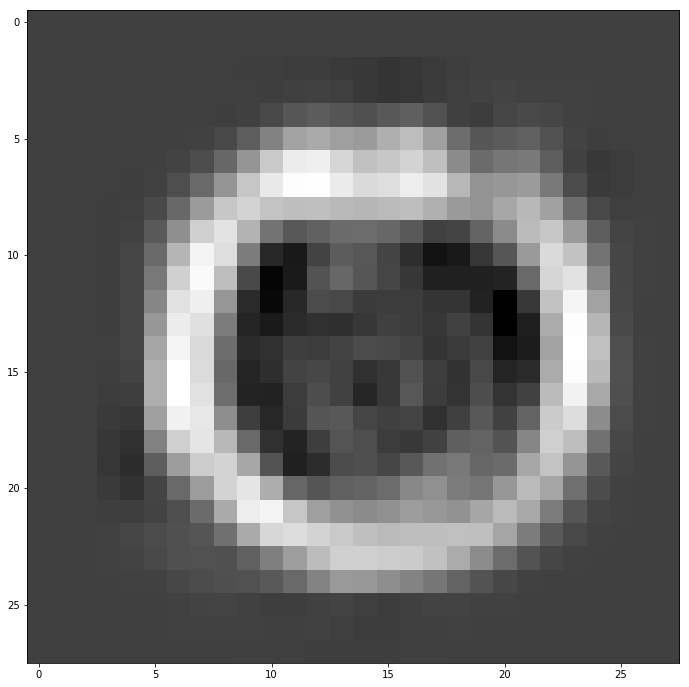

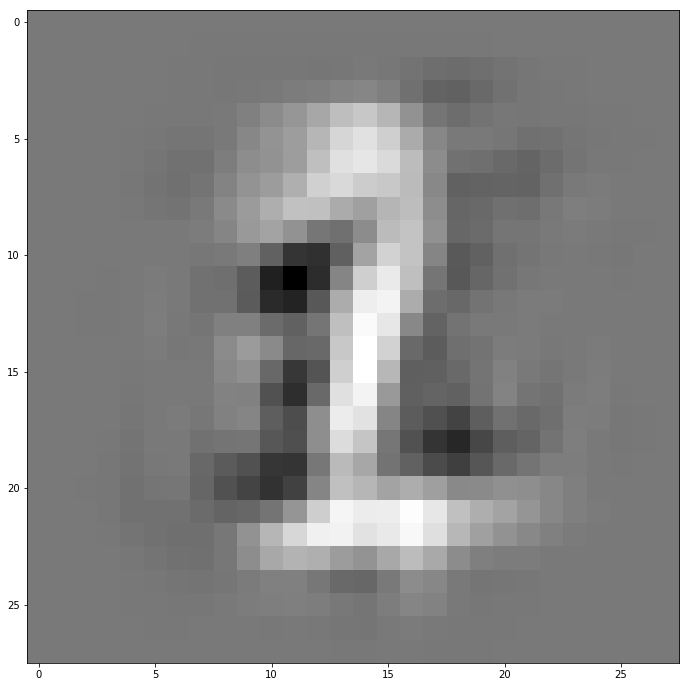

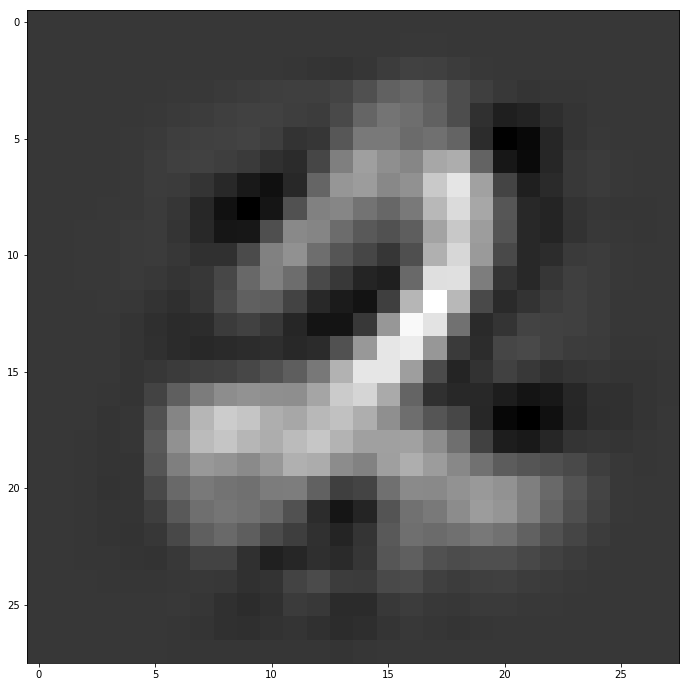

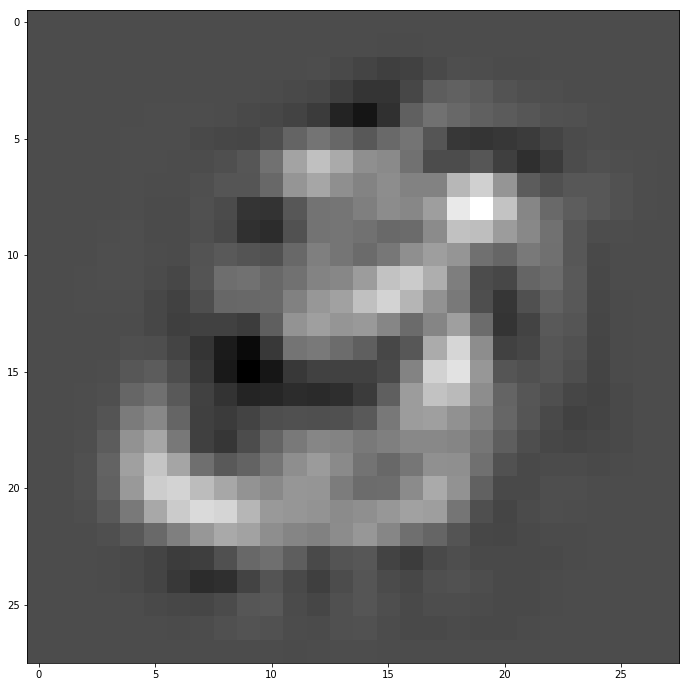

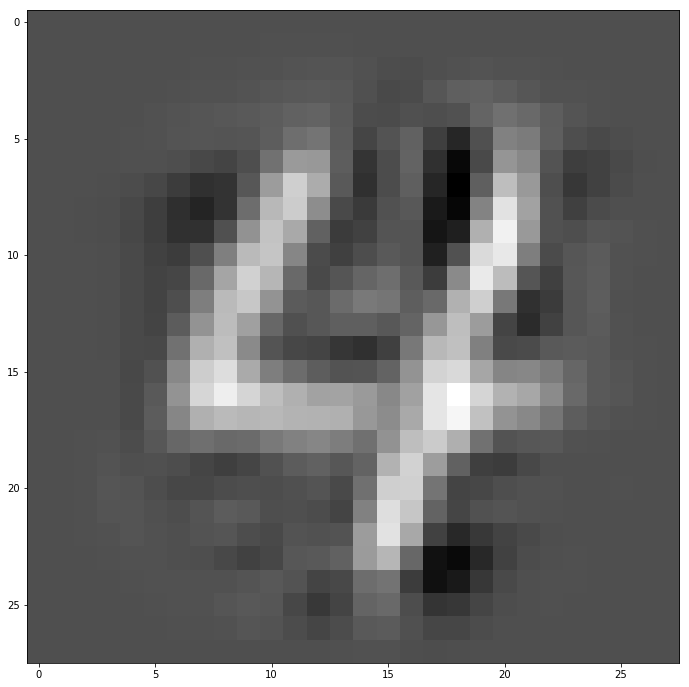

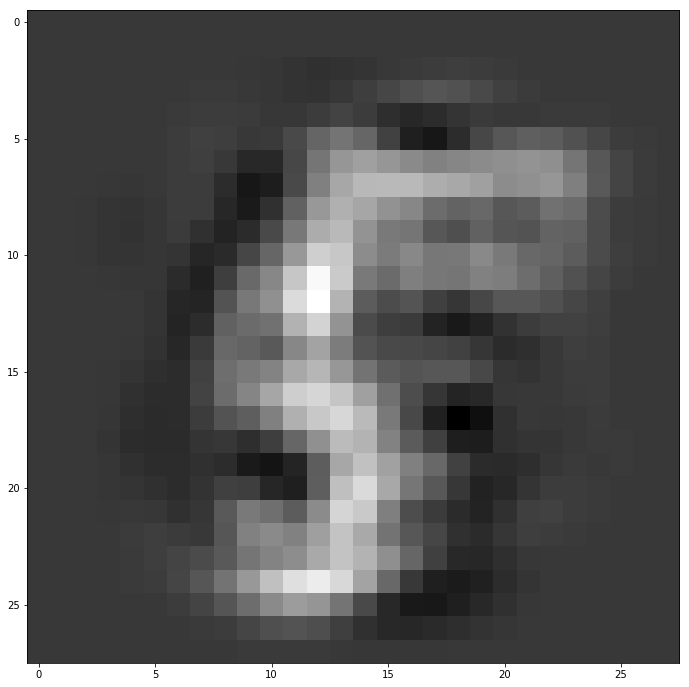

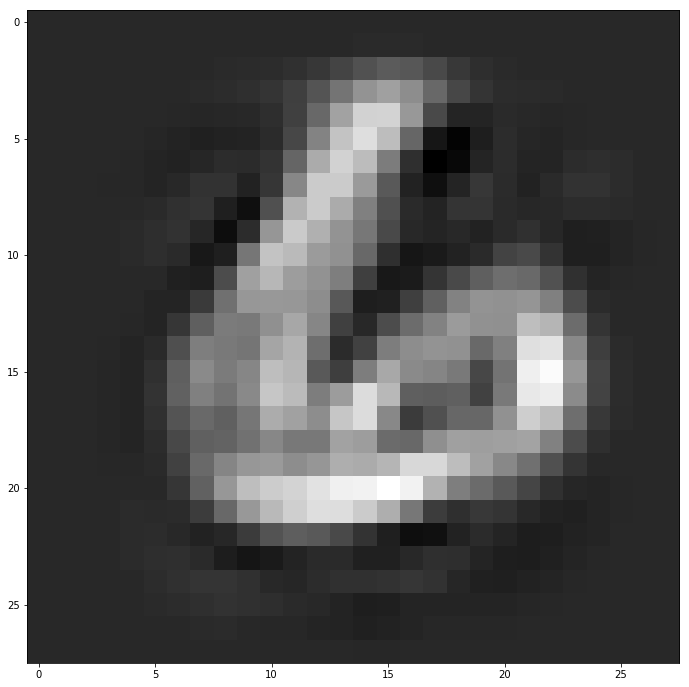

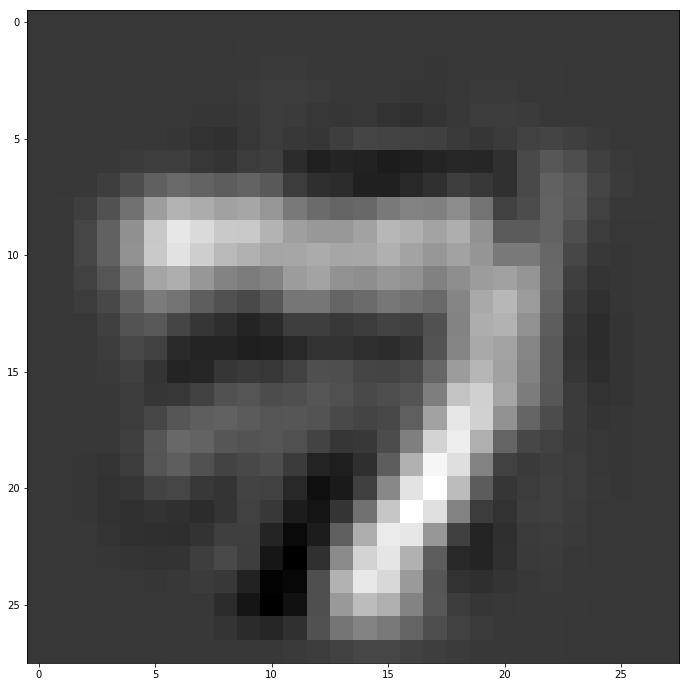

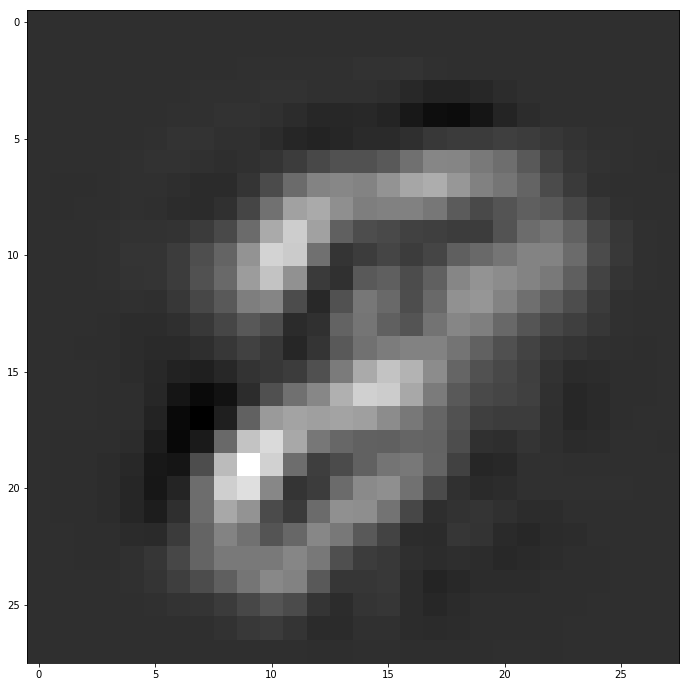

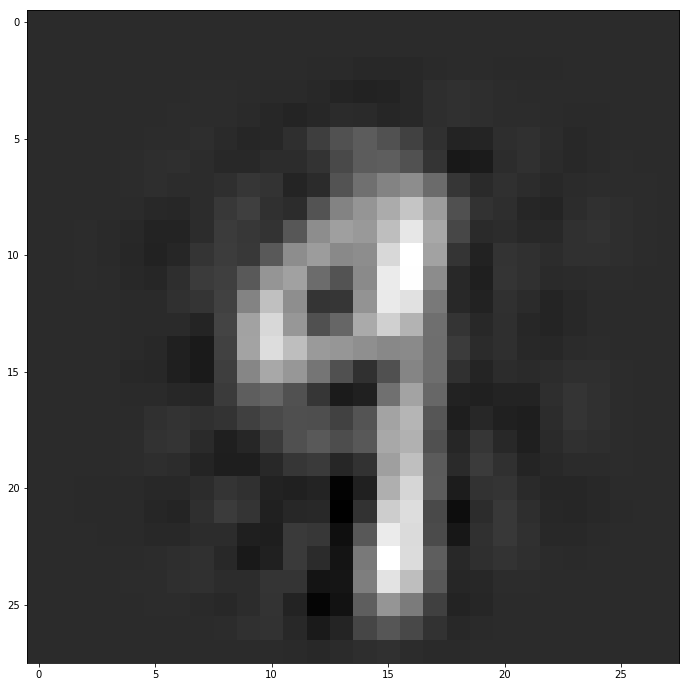

In [12]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12, 12)

for i in range(0, 10):
    sample_value = gaussian_mixtures[i].sample()[0][0]

    plt.imshow(np.reshape(pca.inverse_transform(sample_value) + 123, (28, 28)), cmap='gray')
    plt.grid(False)
    plt.show()

Populating the interactive namespace from numpy and matplotlib


/home/james/.pyenv/versions/3.5.0/envs/mnist/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


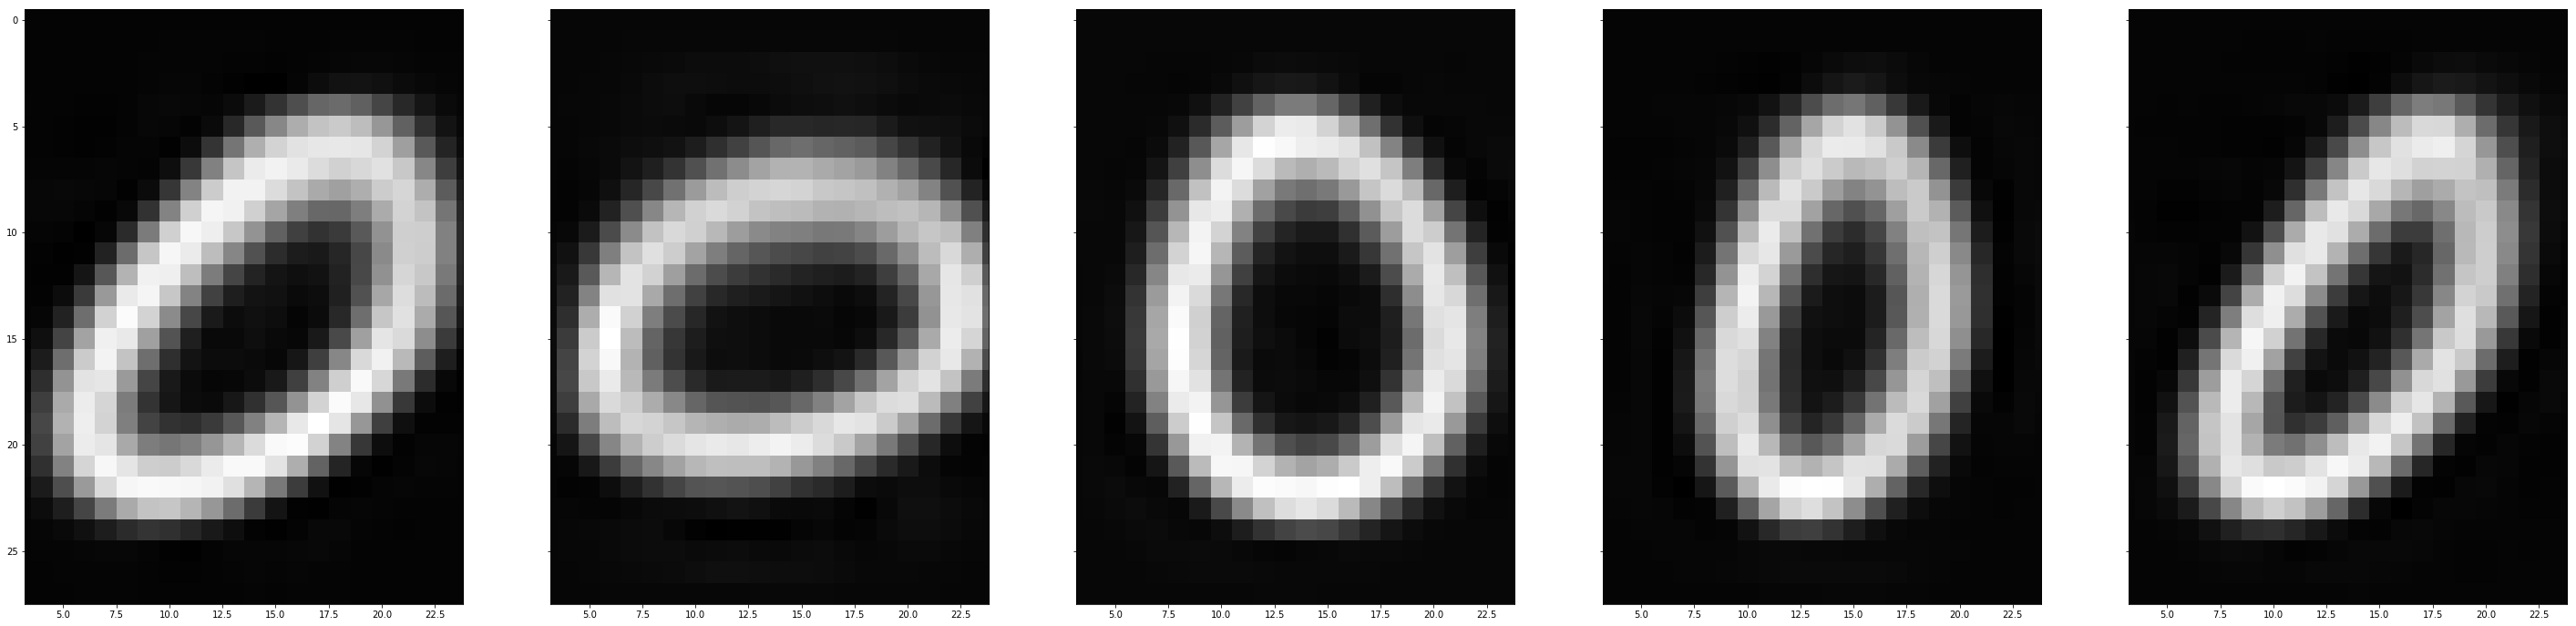

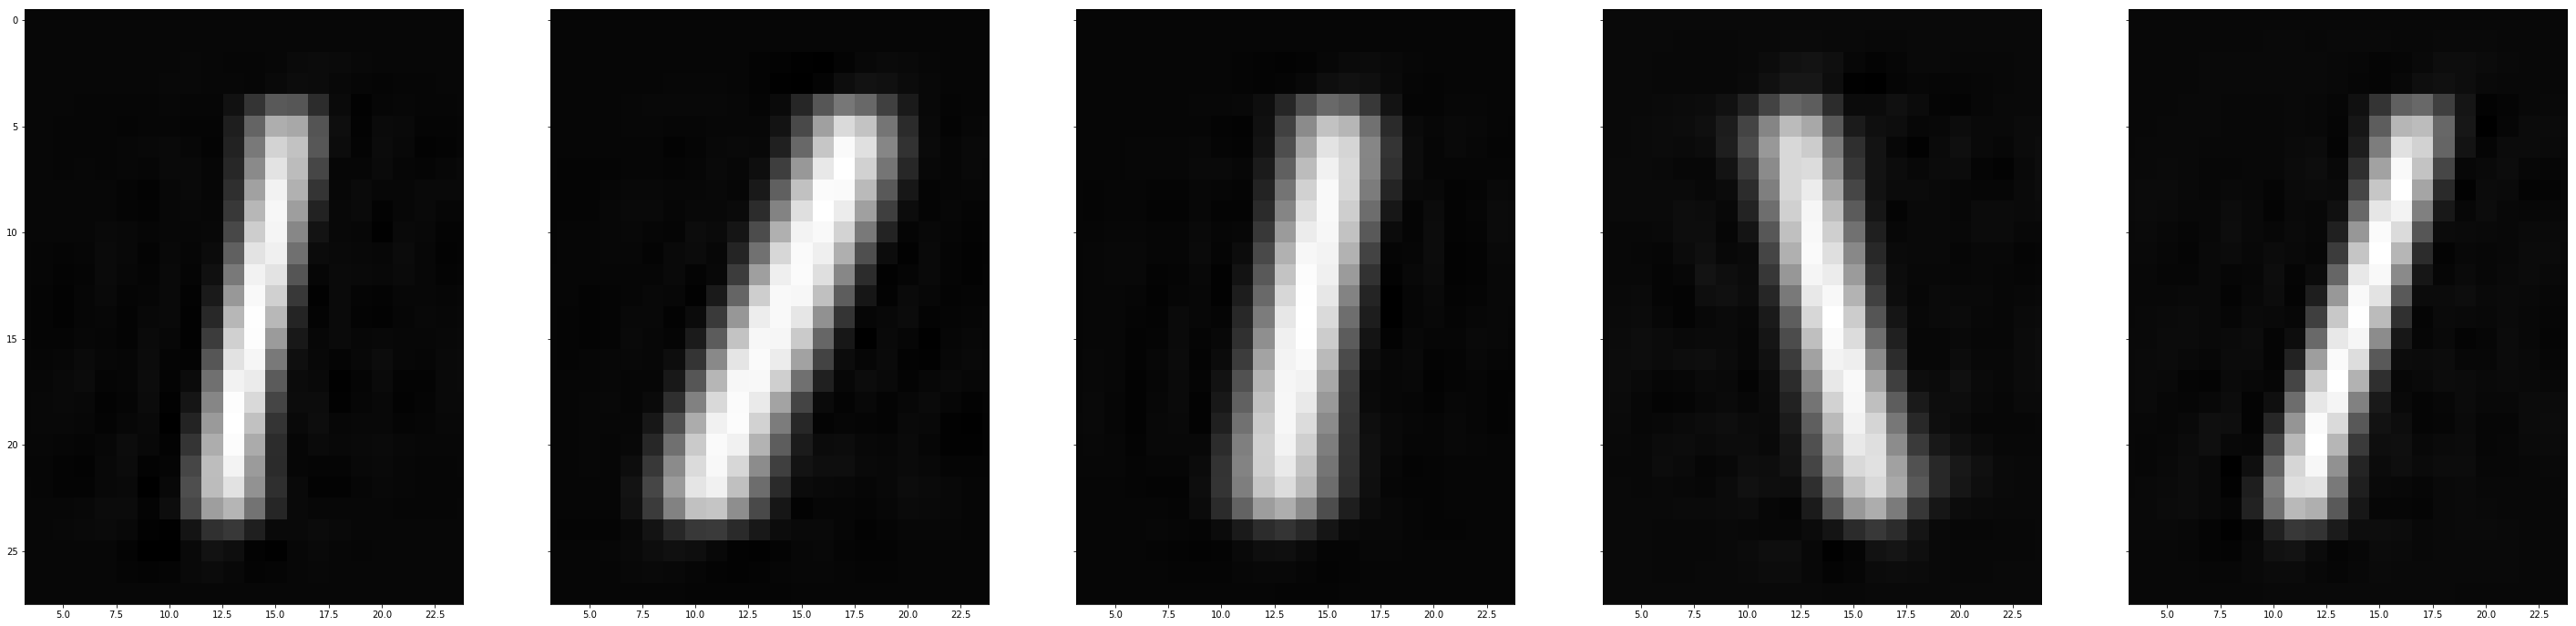

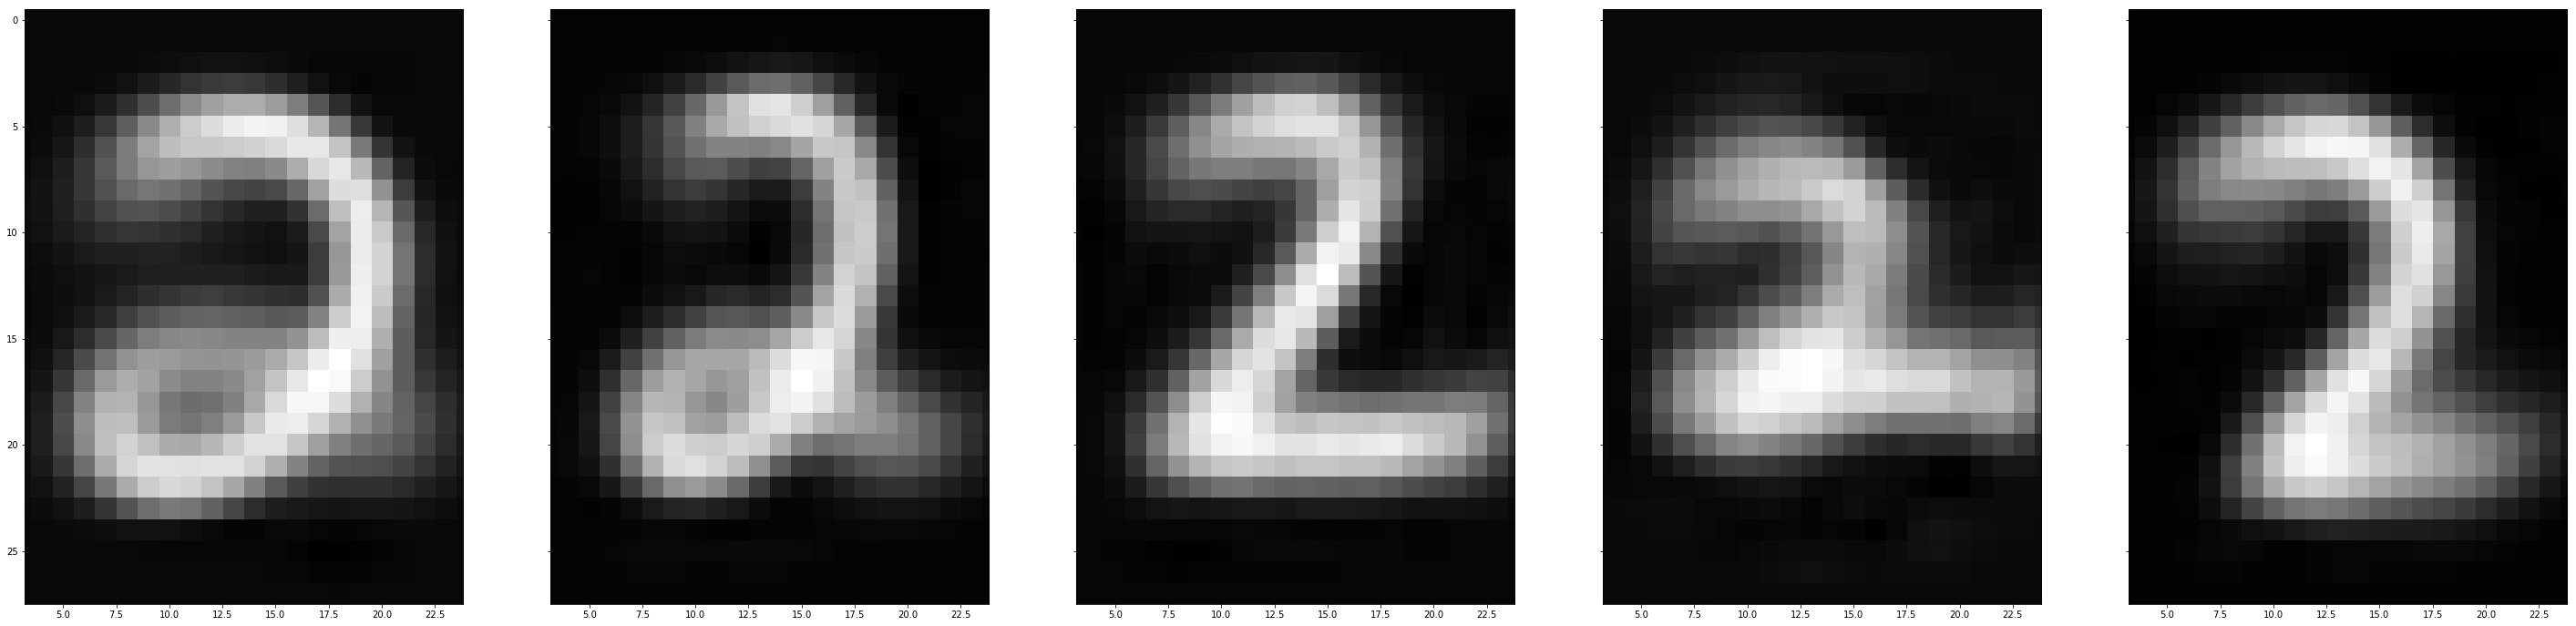

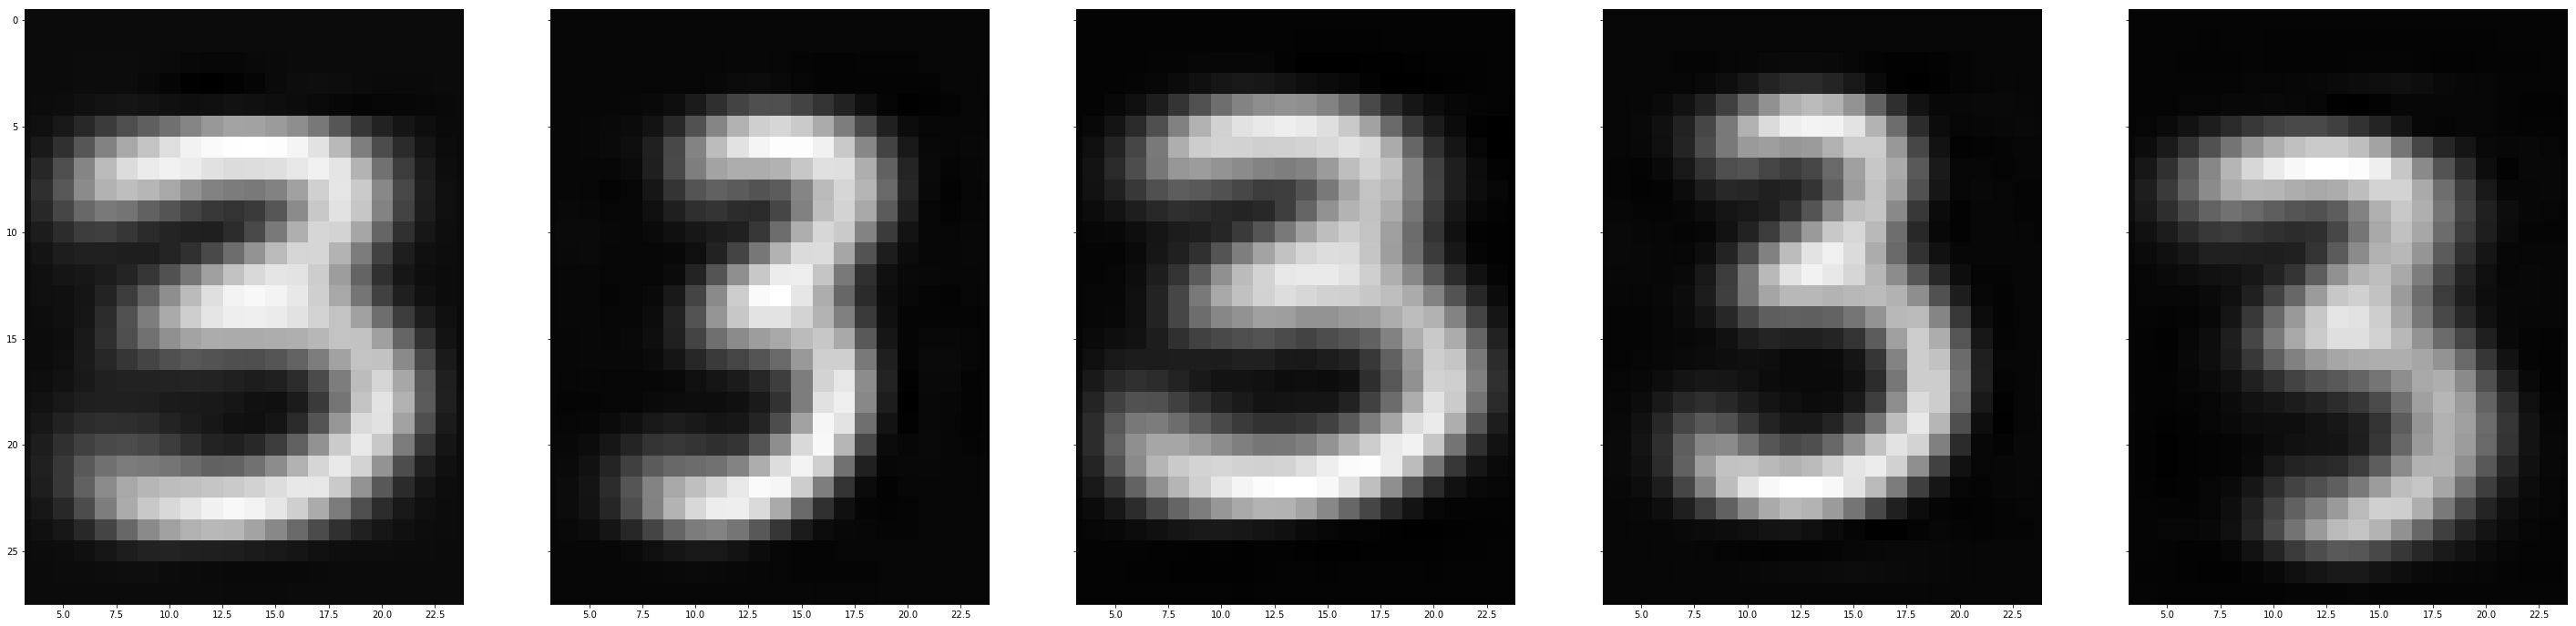

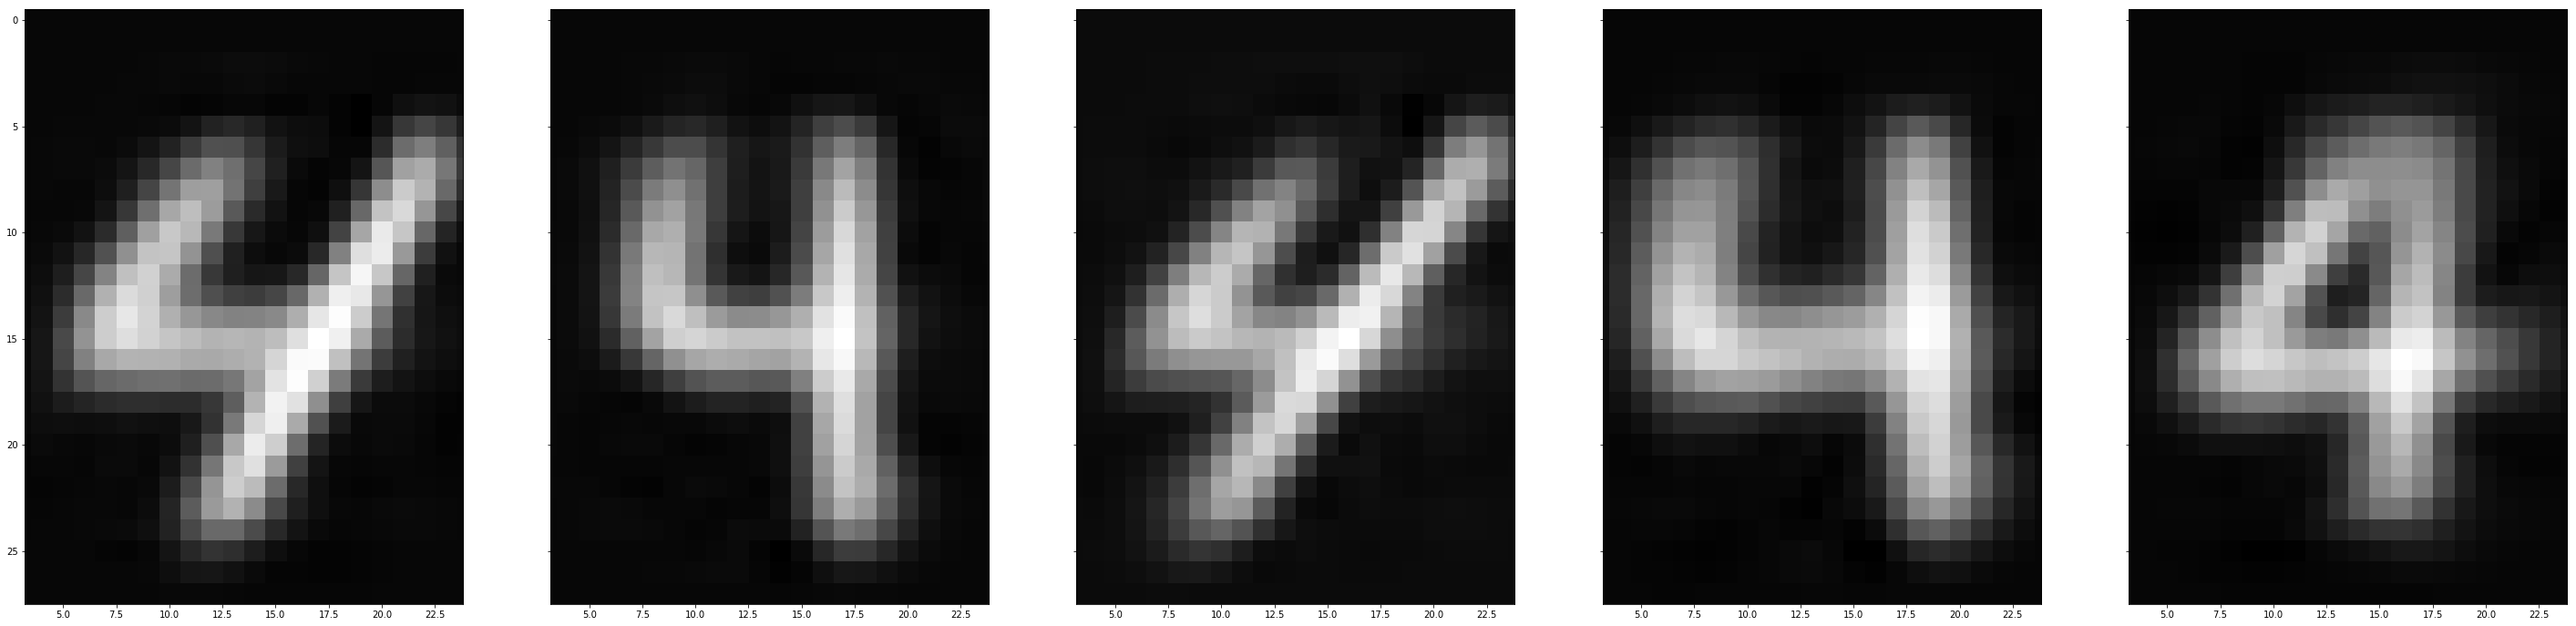

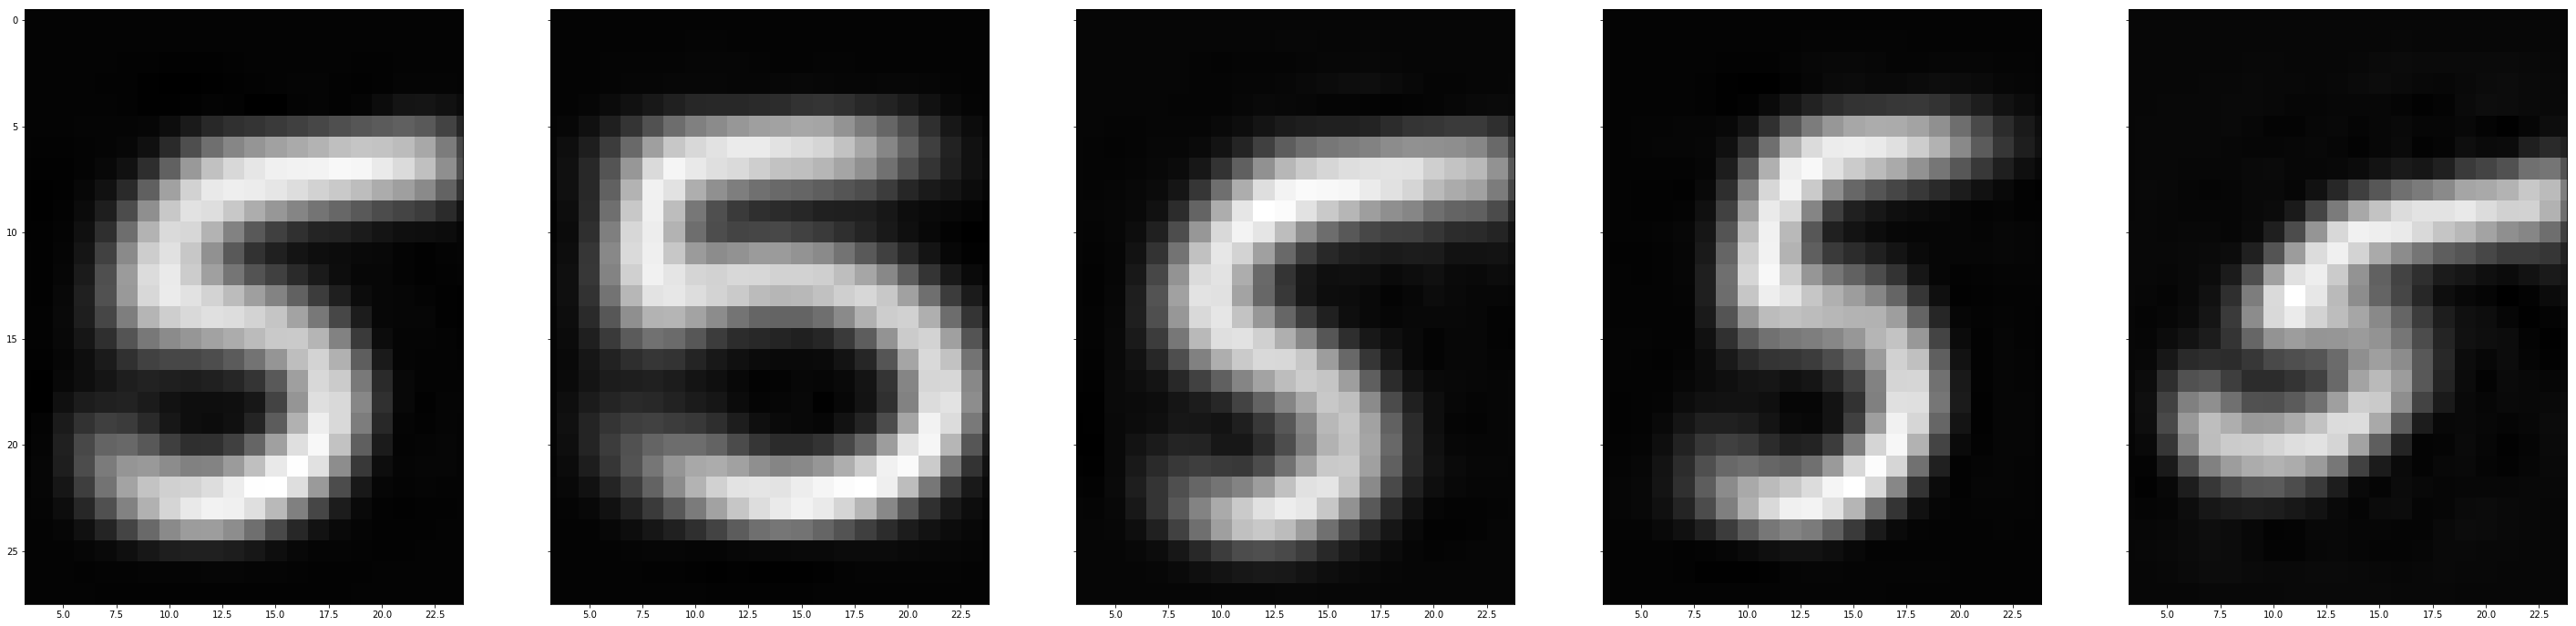

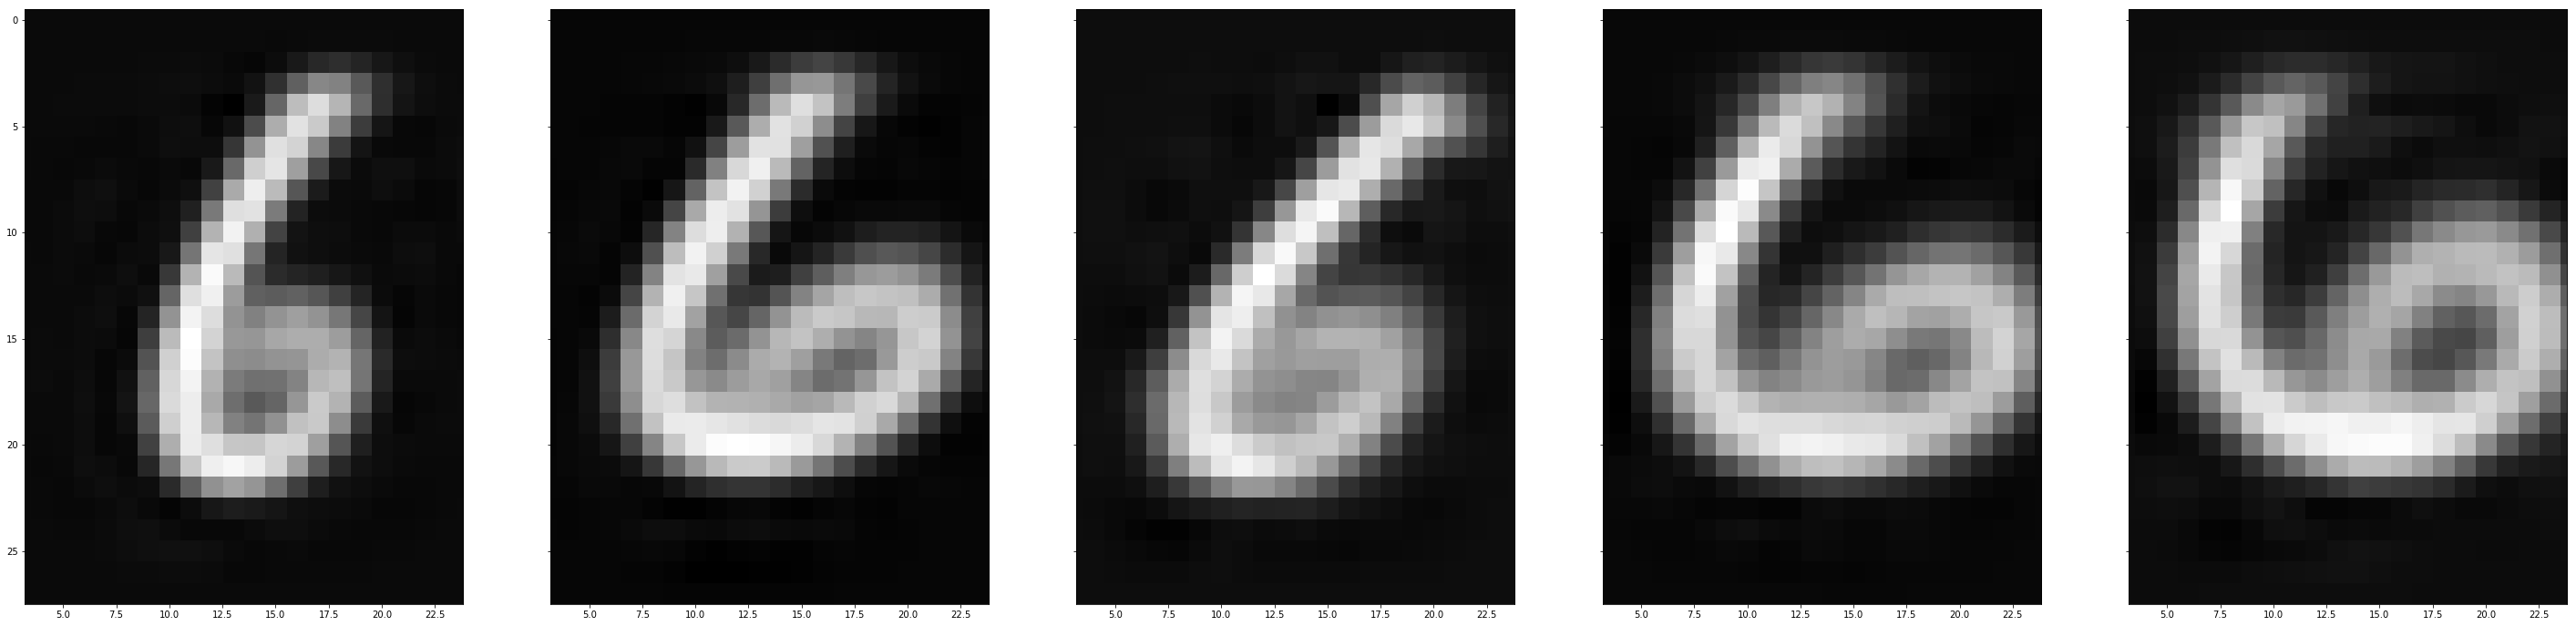

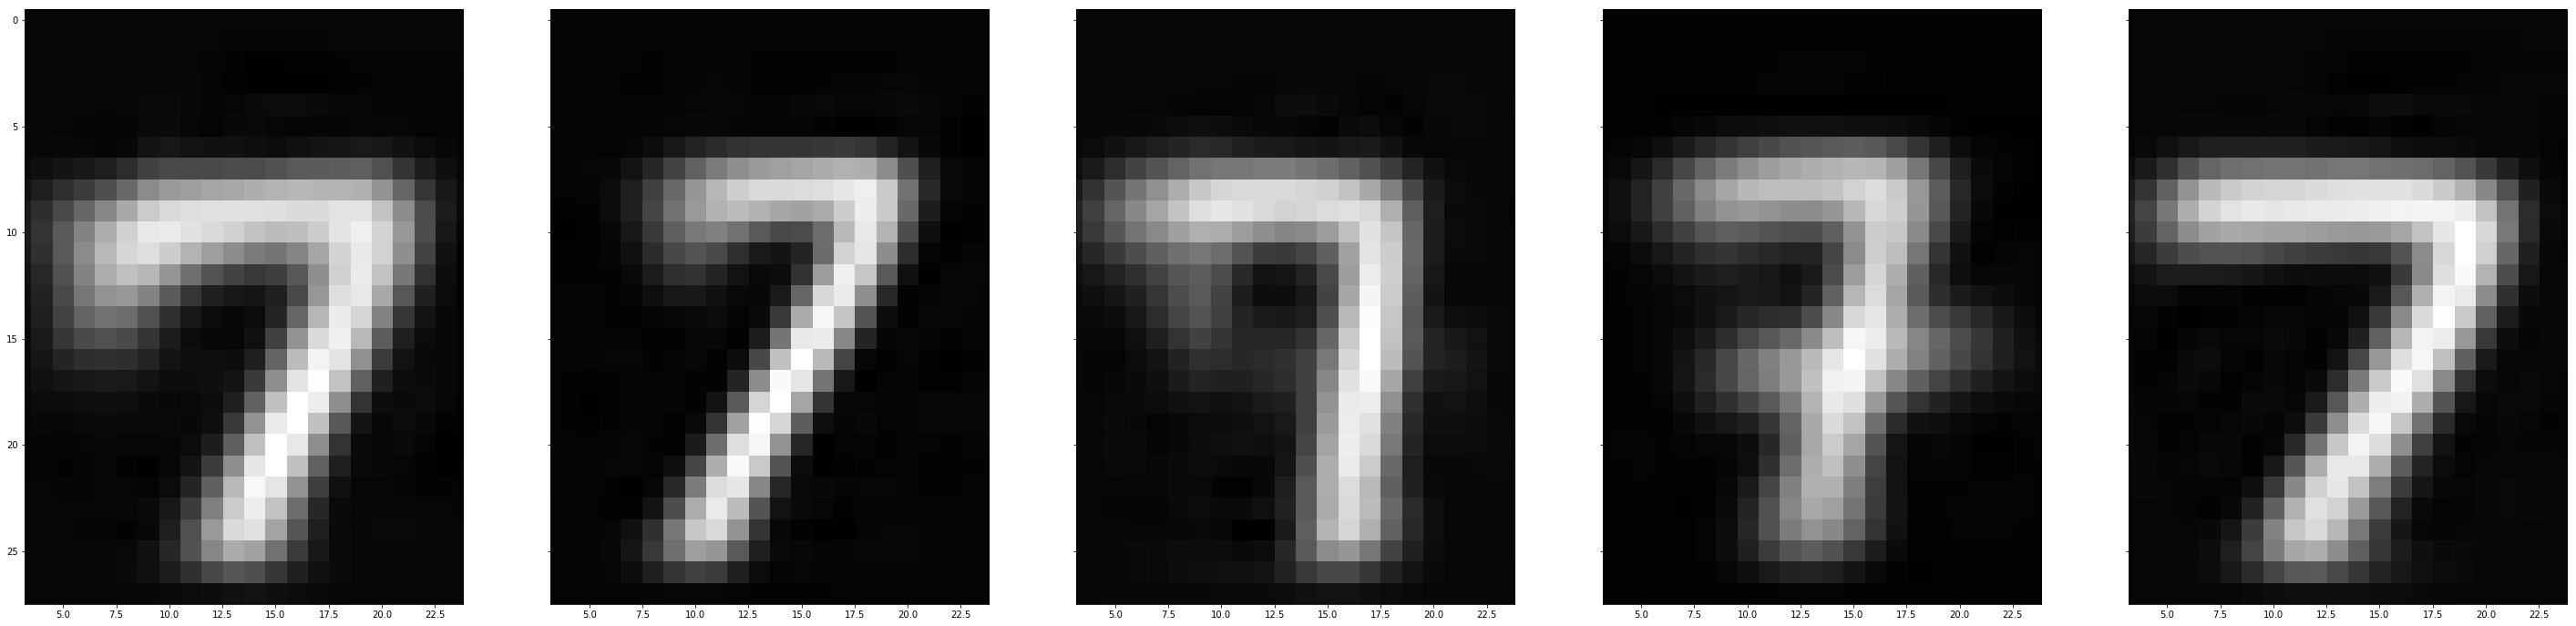

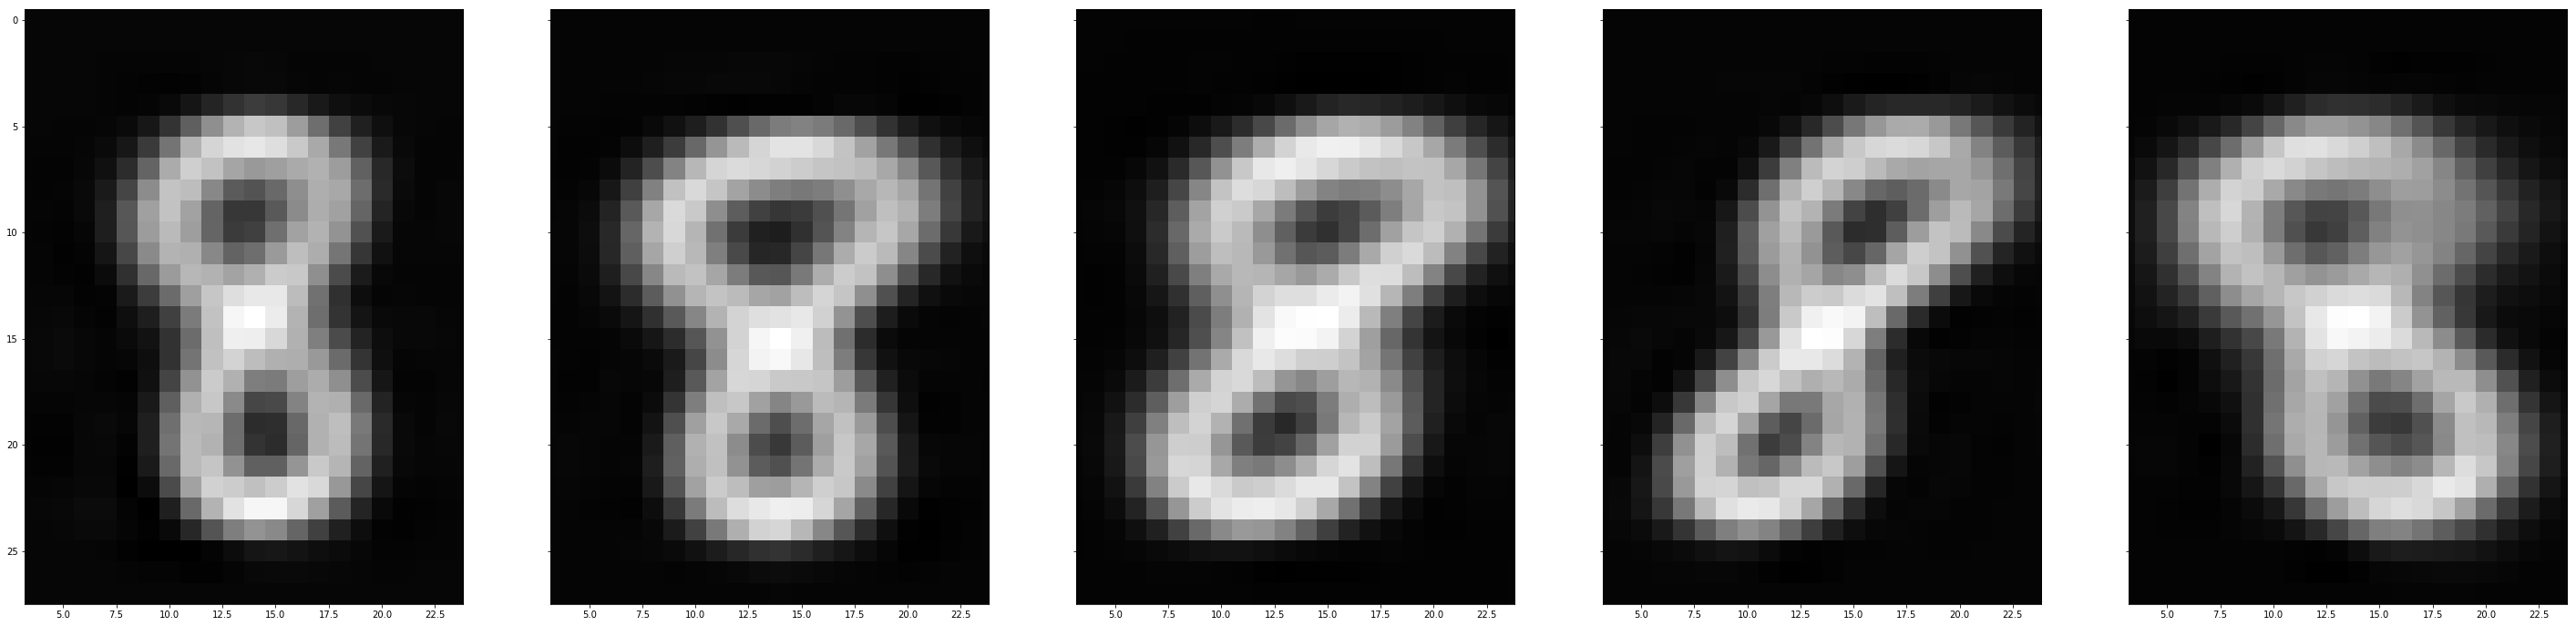

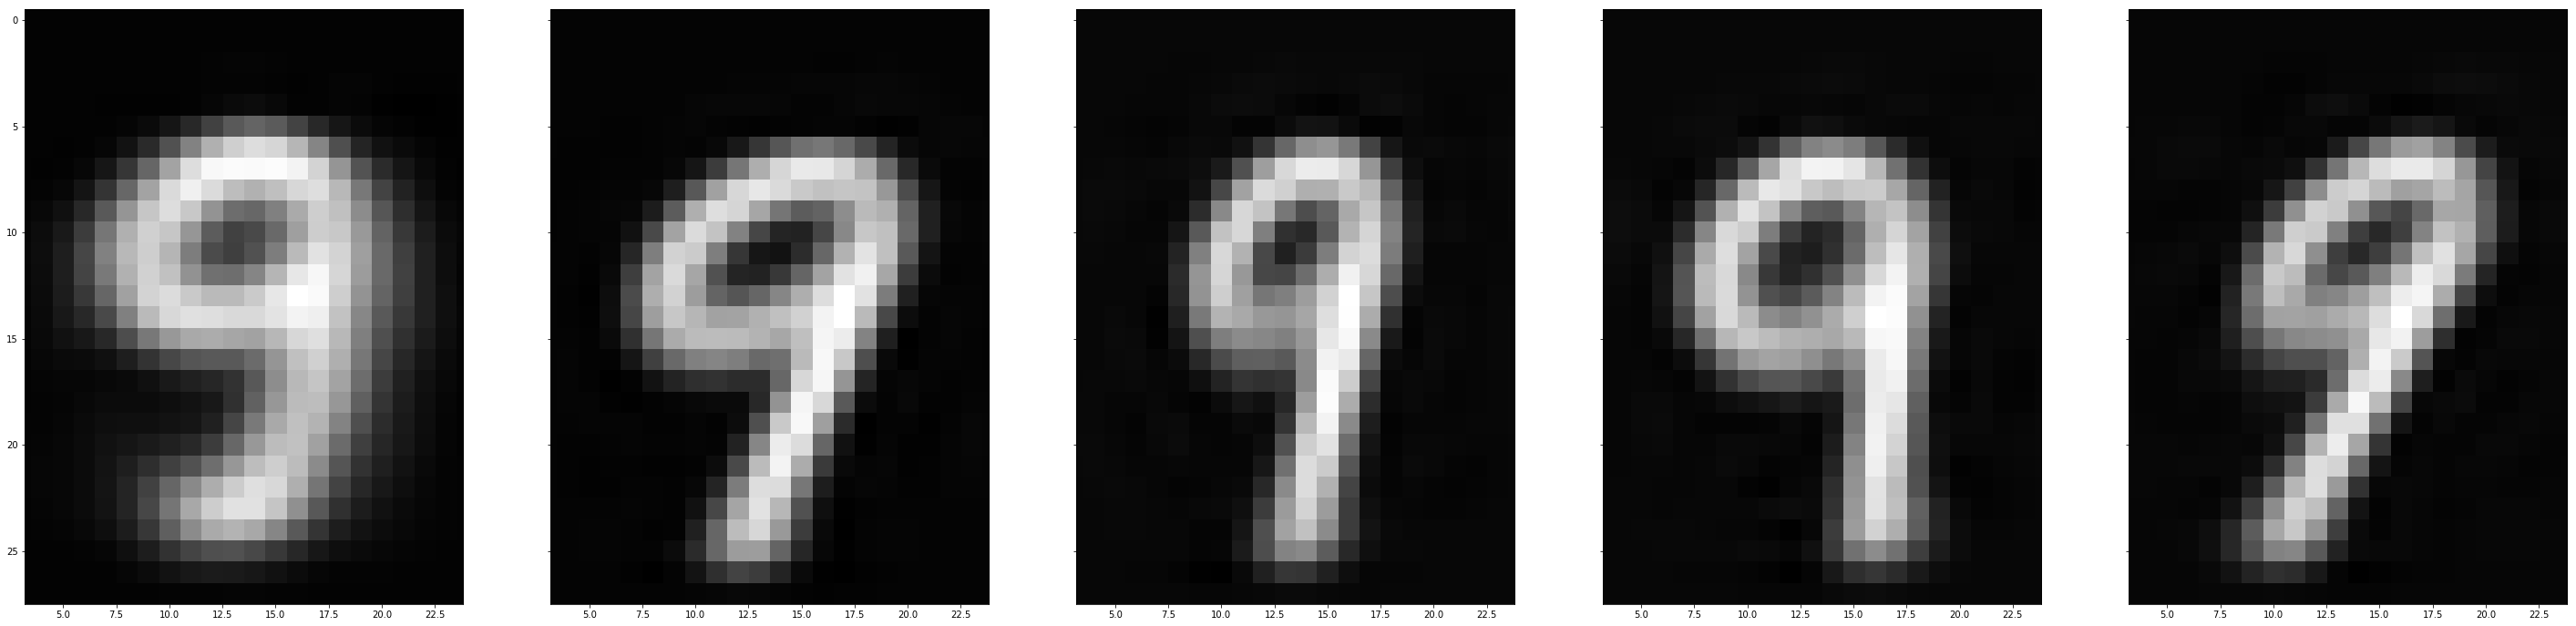

In [14]:
%pylab inline
pylab.rcParams['figure.figsize'] = (50, 12)

for j in range(0, 10):
    f, axarr = plt.subplots(1, 5, sharey=True)

    mean_values = gaussian_mixtures[j].means_

    for i in range(0, 5):
        mean_value = mean_values[i]
        axarr[i].imshow(np.reshape(pca.inverse_transform(mean_value) + 123, (28, 28)), cmap='gray')

    plt.show()

In [15]:
test_scores = []

for i in range(0, 10):
    test_scores.append(gaussian_mixtures[i].score_samples(test_images_pca))

In [16]:
print(test_scores[1][7])

-440.671205546


In [17]:
label_predictions = []

for i in range(0, test_images_pca.shape[0]):
    
    scores = []
    for j in range(0, 10):
        scores.append(test_scores[j][i])
    
    predicted_class = scores.index(max(scores))
    label_predictions.append([test_set.labels[i], predicted_class])

In [18]:
def get_confusion_matrix(n_classes, label_predictions):
    ret = np.zeros((n_classes, n_classes))
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        ret[label, prediction] += 1
    return ret

In [19]:
def get_error_ratio(label_predictions):
    n_errors = 0
    for label_prediction in label_predictions:
        label = label_prediction[0]
        prediction = label_prediction[1]
        if label != prediction:
            n_errors += 1
    return float(n_errors) / float(len(label_predictions))

In [20]:
confusion_matrix = get_confusion_matrix(10, label_predictions)

In [21]:
np.set_printoptions(suppress=True, threshold=10000)
print(confusion_matrix)

[[  973.     0.     3.     1.     0.     0.     0.     0.     2.     1.]
 [    0.  1086.     7.     5.     4.     0.     3.     0.    30.     0.]
 [    2.     1.  1011.     1.     1.     0.     0.     0.    14.     2.]
 [    2.     0.     7.   984.     0.     4.     0.     2.    10.     1.]
 [    1.     0.     2.     1.   934.     0.     3.     7.    17.    17.]
 [    1.     0.     0.    28.     0.   837.     3.     0.    20.     3.]
 [   13.     1.     0.     0.     1.     7.   931.     1.     4.     0.]
 [    1.     1.    19.     4.     3.     0.     0.   963.     6.    31.]
 [    2.     0.     1.     6.     0.     2.     0.     0.   961.     2.]
 [    6.     0.     3.    10.     8.     2.     0.     5.    14.   961.]]


In [22]:
error_ratio = get_error_ratio(label_predictions)

In [23]:
print(error_ratio)

0.0359


In [24]:
def confusion_matrix_to_latex(confusion_matrix):
    print("\[")
    print("\\begin{bmatrix}")
    
    for i in range(0, confusion_matrix.shape[0]):
        string = ""
        for j in range(0, confusion_matrix.shape[1]):
            string += str(int(confusion_matrix[i][j]))
            if j < confusion_matrix.shape[1] - 1:
                string += " & "
            else:
                string += " \\\\"
        print(string)
    
    print("\end{bmatrix}")
    print("\]")

In [25]:
confusion_matrix_to_latex(confusion_matrix)

\[
\begin{bmatrix}
973 & 0 & 3 & 1 & 0 & 0 & 0 & 0 & 2 & 1 \\
0 & 1086 & 7 & 5 & 4 & 0 & 3 & 0 & 30 & 0 \\
2 & 1 & 1011 & 1 & 1 & 0 & 0 & 0 & 14 & 2 \\
2 & 0 & 7 & 984 & 0 & 4 & 0 & 2 & 10 & 1 \\
1 & 0 & 2 & 1 & 934 & 0 & 3 & 7 & 17 & 17 \\
1 & 0 & 0 & 28 & 0 & 837 & 3 & 0 & 20 & 3 \\
13 & 1 & 0 & 0 & 1 & 7 & 931 & 1 & 4 & 0 \\
1 & 1 & 19 & 4 & 3 & 0 & 0 & 963 & 6 & 31 \\
2 & 0 & 1 & 6 & 0 & 2 & 0 & 0 & 961 & 2 \\
6 & 0 & 3 & 10 & 8 & 2 & 0 & 5 & 14 & 961 \\
\end{bmatrix}
\]
